# Self Organizing Map To Group Benign and Malignant Breast Cancer Diagnosis

In [1]:
import pandas as pd

In [26]:
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from matplotlib.pylab import pcolor, colorbar, plot

In [14]:
dataset = pd.read_csv('input_breastCancer.csv')
dataset

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.00000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,205.00000,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,111.00000,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,141.00000,0.21130,0.4107,0.2216,206.0000,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,144.00000,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,159.0000,0.05648,...,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,277.00000,0.35140,152.00000,0.2397,0.07016,...,25.74,39.42,184.60,1821.0,165.00000,0.86810,0.9387,265.0000,0.4087,124.00000


In [15]:
normalizer = MinMaxScaler(feature_range= (0, 1))
dataset = normalizer.fit_transform(dataset)

In [56]:
model = MiniSom(x = 11, y = 11, input_len= 30, sigma= 3.0, learning_rate= 0.5, random_seed= 2)

In [57]:
model.random_weights_init(dataset)

In [58]:
model.train_random(data= dataset, num_iteration= 1000)

In [59]:
model._weights.shape

(11, 11, 30)

In [60]:
model._activation_map, model._activation_map.shape

(array([[0.7473229 , 0.61982906, 0.47489899, 0.57665745, 0.73345299,
         0.87625957, 0.91489926, 0.80731016, 0.71511272, 0.72119177,
         0.88446468],
        [0.58438204, 0.42646398, 0.3342758 , 0.43691399, 0.6123587 ,
         0.75239875, 0.7745552 , 0.6932514 , 0.63018438, 0.57362287,
         0.69046576],
        [0.40633685, 0.28779735, 0.25925718, 0.29322555, 0.4165096 ,
         0.5500753 , 0.59502736, 0.5755844 , 0.54457567, 0.51868664,
         0.54467901],
        [0.62890483, 0.38795036, 0.25867342, 0.264299  , 0.31466444,
         0.41920063, 0.50922548, 0.53348556, 0.53165259, 0.54225786,
         0.5854458 ],
        [0.8223151 , 0.52508152, 0.31360727, 0.29606473, 0.32516631,
         0.40163416, 0.504978  , 0.53684487, 0.56835794, 0.59405151,
         0.64252849],
        [0.67187126, 0.46675167, 0.37082643, 0.35296565, 0.38377985,
         0.47902176, 0.59963981, 0.59078036, 0.61841443, 0.65053226,
         0.69690709],
        [0.40378709, 0.37337625, 0.38884

In [61]:
q = model.activation_response(dataset)
q, q.shape

(array([[ 7.,  8.,  1., 11.,  6.,  6.,  5.,  2.,  2.,  0., 14.],
        [ 5.,  0.,  6.,  7.,  2.,  2.,  1.,  7.,  4.,  0.,  4.],
        [ 2.,  1.,  7.,  4.,  7.,  4.,  3.,  5.,  5.,  7.,  0.],
        [ 0.,  1., 12.,  3.,  4.,  2.,  3.,  5.,  2.,  3., 13.],
        [12.,  0.,  7.,  9.,  6.,  2.,  1.,  7., 11.,  6., 12.],
        [ 0.,  0.,  2.,  3., 12.,  0.,  5.,  0., 13.,  9., 19.],
        [ 5.,  7.,  0.,  6., 12.,  1.,  0.,  0.,  4.,  5., 18.],
        [ 2.,  6., 17.,  5., 13.,  2., 13.,  5.,  0.,  0.,  0.],
        [ 3.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0., 11.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  5.,  3.,  0.,  3.,  8.],
        [14.,  0., 24.,  4.,  1.,  0., 10., 17.,  2.,  4.,  8.]]),
 (11, 11))

In [62]:
w = model.winner(dataset[0])
w

(0, 8)

In [63]:
y = pd.read_csv('output_breastCancer.csv')
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [64]:
markers = ['o', 's']
color = ['r', 'g']

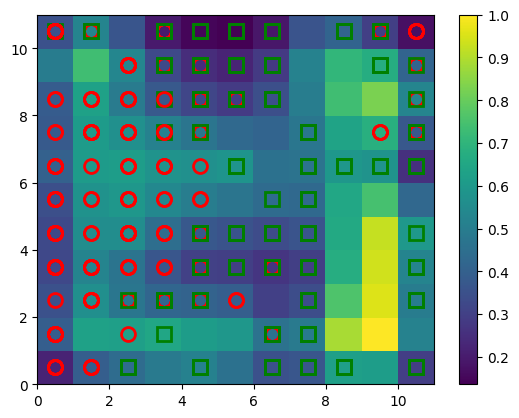

In [65]:
pcolor(model.distance_map().T)
colorbar()

for i, element in enumerate(dataset):
    w = model.winner(element)
    
    plot(w[0] + 0.5, w[1] + 0.5, markers[y['0'][i]], markerfacecolor= 'None', markeredgecolor= color[y['0'][i]], markeredgewidth= 2, markersize= 10)
